In [1]:
import sys, platform, os
import numpy as np
import camb
import pandas as pd
import healpy as hp
from camb import model, initialpower
import useful_functions as uf
import pysm3
from fgbuster import (CMB, Dust, Synchrotron, basic_comp_sep,get_observation, get_instrument)
from fgbuster.visualization import corner_norm
nside=16

In [2]:
input_folder="/home/amorelli/foreground_noise_maps/noise_maps_d1s1_train/"
input_files=os.listdir(input_folder)
for j in range(len(input_files)):
        input_files[j]=input_folder+"/"+input_files[j]

print(input_files)

In [3]:
n_pix=hp.nside2npix(16)
f_ = [np.load(input_file) for input_file in input_files]
label=f_[0].files[0]
data_example=f_[0][label]
dim_example=len(data_example)
n_input=len(f_)*dim_example #numero di tutte le mappe di input
data=np.zeros((n_input,n_pix,data_example.shape[-1]))

In [4]:
for i,file in enumerate(f_):
    data[i*dim_example:(i+1)*dim_example]=file[label]

In [5]:
data_E,data_B = uf.convert_to_EB(data)

hp.mollview(data[0,:,0])

In [6]:
mean_map_Q=np.zeros(n_pix)
sigma_map_Q=np.zeros(n_pix)
mean_map_U=np.zeros(n_pix)
sigma_map_U=np.zeros(n_pix)
mean_map_E=np.zeros(n_pix)
sigma_map_E=np.zeros(n_pix)
mean_map_B=np.zeros(n_pix)
sigma_map_B=np.zeros(n_pix)
for i in range(n_pix):
    mean_map_Q[i]=np.mean(data[:,i,0])
    sigma_map_Q[i]=np.std(data[:,i,0])
    mean_map_U[i]=np.mean(data[:,i,1])
    sigma_map_U[i]=np.std(data[:,i,1])
    mean_map_E[i]=np.mean(data_E[:,i,0])
    sigma_map_E[i]=np.std(data_E[:,i,0])
    mean_map_B[i]=np.mean(data_B[:,i,0])
    sigma_map_B[i]=np.std(data_B[:,i,0])

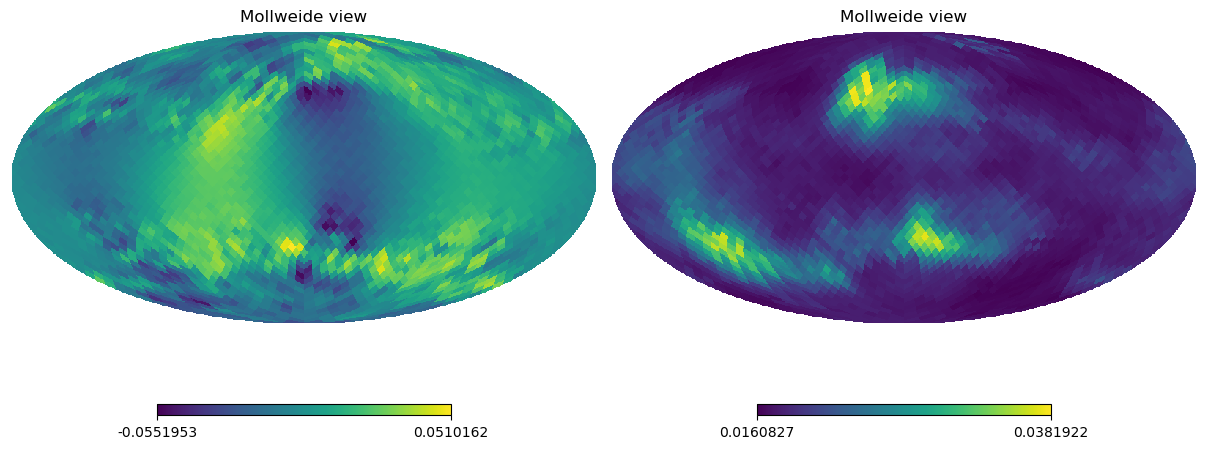

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = 12, 16
hp.mollview(mean_map_E,sub=(1,2,1))
hp.mollview(sigma_map_E,sub=(1,2,2))

In [18]:
import scipy.stats as st
print(st.norm.cdf(1)-st.norm.cdf(-1))
p=0.68
p_ext=0.32/2
print(st.norm.ppf(1-p_ext))
print(st.norm.ppf(p_ext))

0.6826894921370859
0.994457883209753
-0.994457883209753


0.2533471031357997
0.5244005127080407
0.8416212335729143
1.0364333894937898
1.2815515655446004
1.6448536269514722


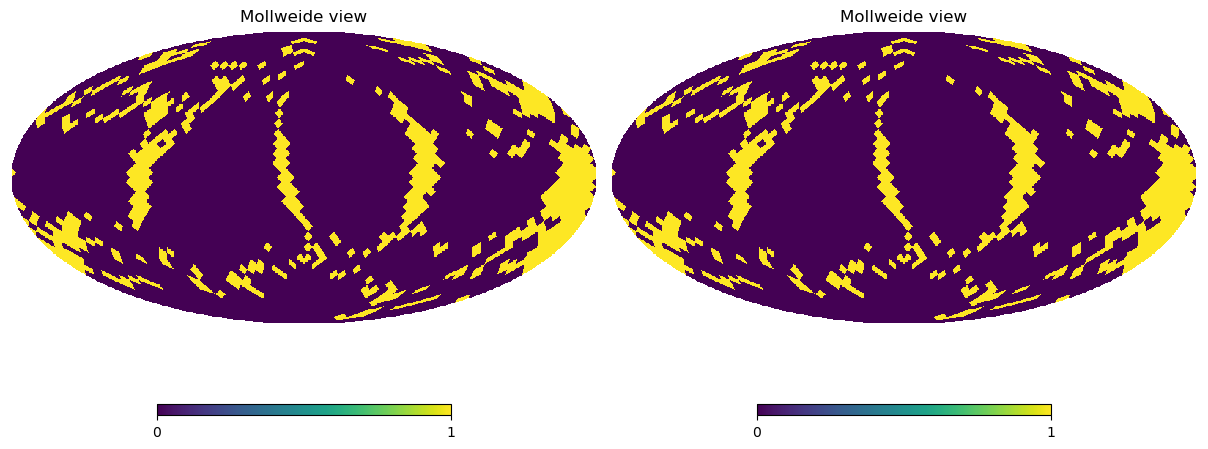

In [23]:
std=np.std(mean_map_E)
fill_value=0
anti_fill=1
probabilities=[0.2,0.4,0.6,0.7,0.8,0.9] #percentage of values to include (not to mask)
masked_E=[]
for p in probabilities:
    p_ext=(1-p)/2
    n=st.norm.ppf(1-p_ext)
    print(n)
    masked_E.append(np.empty_like(mean_map_E))
    for i in range(n_pix):
        if np.abs(mean_map_E[i])>=n*std:
            masked_E[-1][i]=fill_value
        else:
            masked_E[-1][i]=anti_fill#mean_map_E[i]
hp.mollview(masked_E[0],sub=(1,2,1))
hp.mollview(masked_E[0],sub=(1,2,2))

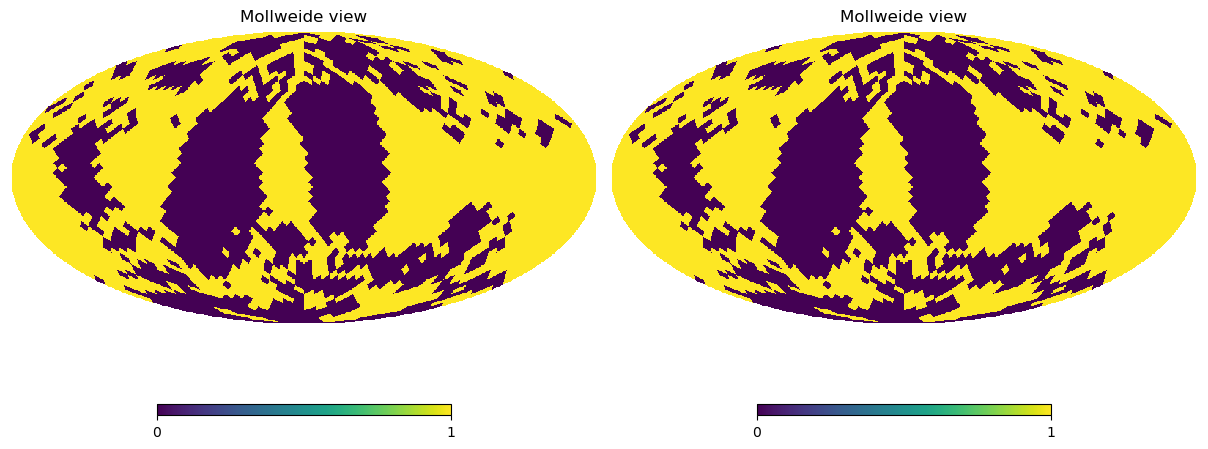

In [33]:
hp.mollview(masked_E[2],sub=(1,2,1))
hp.mollview(masked_E[2],sub=(1,2,2))

In [30]:
outfile_name="/home/amorelli/maschera_custom"
kwargs = {str(key): masked_E[key] for key in range(len(masked_E))}
np.savez(outfile_name, **kwargs)

['2']


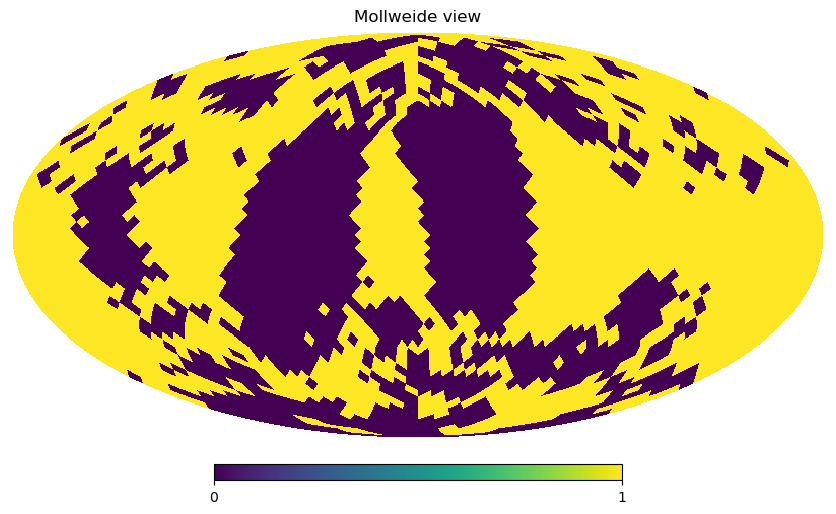

In [34]:
f_ = np.load(outfile_name+".npz")
field=[2]
labels=[f_.files[l] for l in field]
print(labels)
hp.mollview(f_[labels[0]])
#maschere = [f_[l] for l in labels]

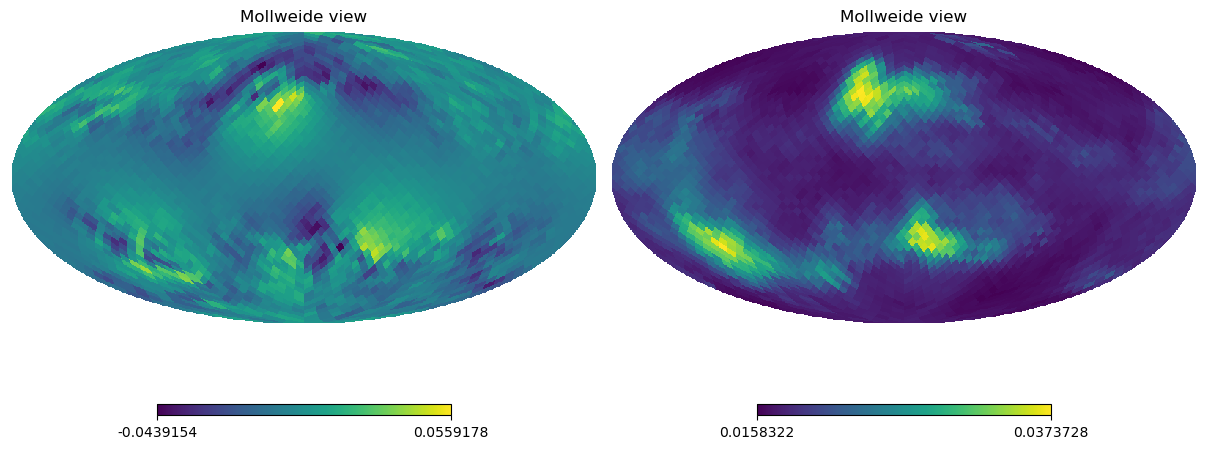

In [32]:
hp.mollview(mean_map_B,sub=(1,2,1))
hp.mollview(sigma_map_B,sub=(1,2,2))